In [1]:
# making the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import torch_geometric as tg
import torch_geometric.transforms as T

In [2]:
# defining the transformations
pre_transform = T.NormalizeScale()
transform = T.SamplePoints(2048)

In [3]:
# Loading the ModelNet10 dataset from torch geometric
train = tg.datasets.ModelNet(root='./data/Q1/train/', name='10', train=True, pre_transform=pre_transform, transform=transform)

/opt/homebrew/Caskroom/miniforge/base/envs/gdl_env/lib/python3.8/site-packages/torch_geometric/data/dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exis

In [4]:
test = tg.datasets.ModelNet(root='./data/Q1/test/', name='10', train=False, pre_transform=pre_transform, transform=transform)

In [5]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

In [6]:
# Exploring the train and test datasets
train.print_summary()

/opt/homebrew/Caskroom/miniforge/base/envs/gdl_env/lib/python3.8/site-packages/torch_geometric/transforms/sample_points.py:40: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Cross.cpp:66.)
  area = (pos[face[1]] - pos[face[0]]).cross(pos[face[2]] - pos[face[0]])


ModelNet (#graphs=3991):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     2048 |        0 |
| std        |        0 |        0 |
| min        |     2048 |        0 |
| quantile25 |     2048 |        0 |
| median     |     2048 |        0 |
| quantile75 |     2048 |        0 |
| max        |     2048 |        0 |
+------------+----------+----------+


In [7]:
print(f'Number of classes: {train.num_classes}')
print(f'Number of features: {train.num_features}')
print(f'Number of training examples: {len(train)}')
print(f'Different class names: {train.raw_file_names}')

Number of classes: 10
Number of features: 0
Number of training examples: 3991
Different class names: ['bathtub', 'bed', 'chair', 'desk', 'dresser', 'monitor', 'night_stand', 'sofa', 'table', 'toilet']


In [8]:
# For the visualizations
def plot_3d_scatter(vec, label=None):
    '''Plot a vector data as a 3D scatter'''
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vec[:, 0], vec[:, 1], vec[:, 2], marker=">", c='#125D4C', label=label)
    plt.show()

In [9]:
# looking at an individual graph from the training dataset
bathtub_data = train[0]
print(bathtub_data)

Data(pos=[2048, 3], y=[1])


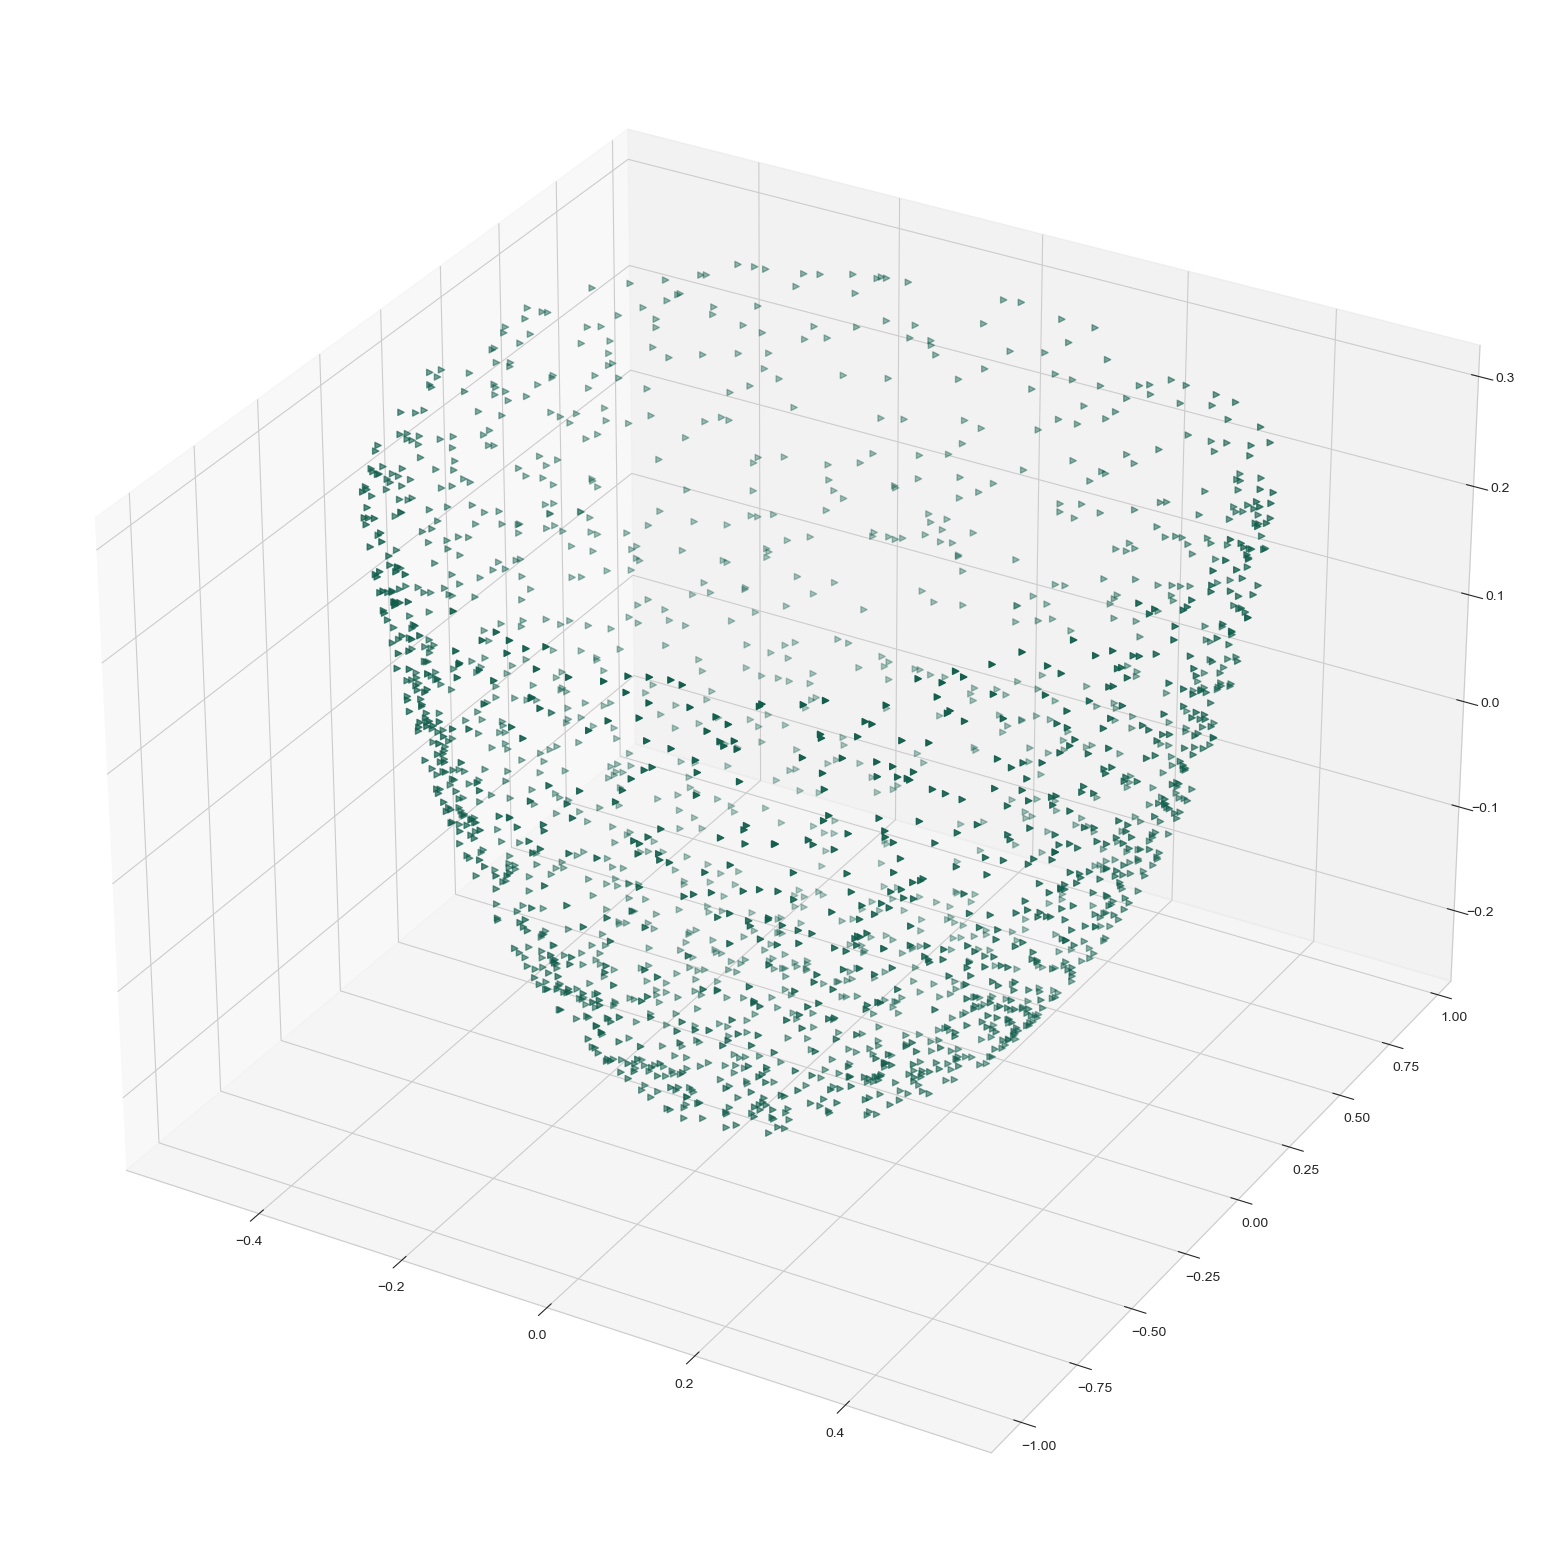

In [10]:
# Visualizing the graph as a 3D object using seaborn
plot_3d_scatter(bathtub_data.pos, label='Bathtub')

In [11]:
# Trying to visualize a bed example
bed_data = None
for i in range(len(train)):
    if train[i].y == 1:
        bed_data = train[i]
        break
print(bed_data)

Data(pos=[2048, 3], y=[1])


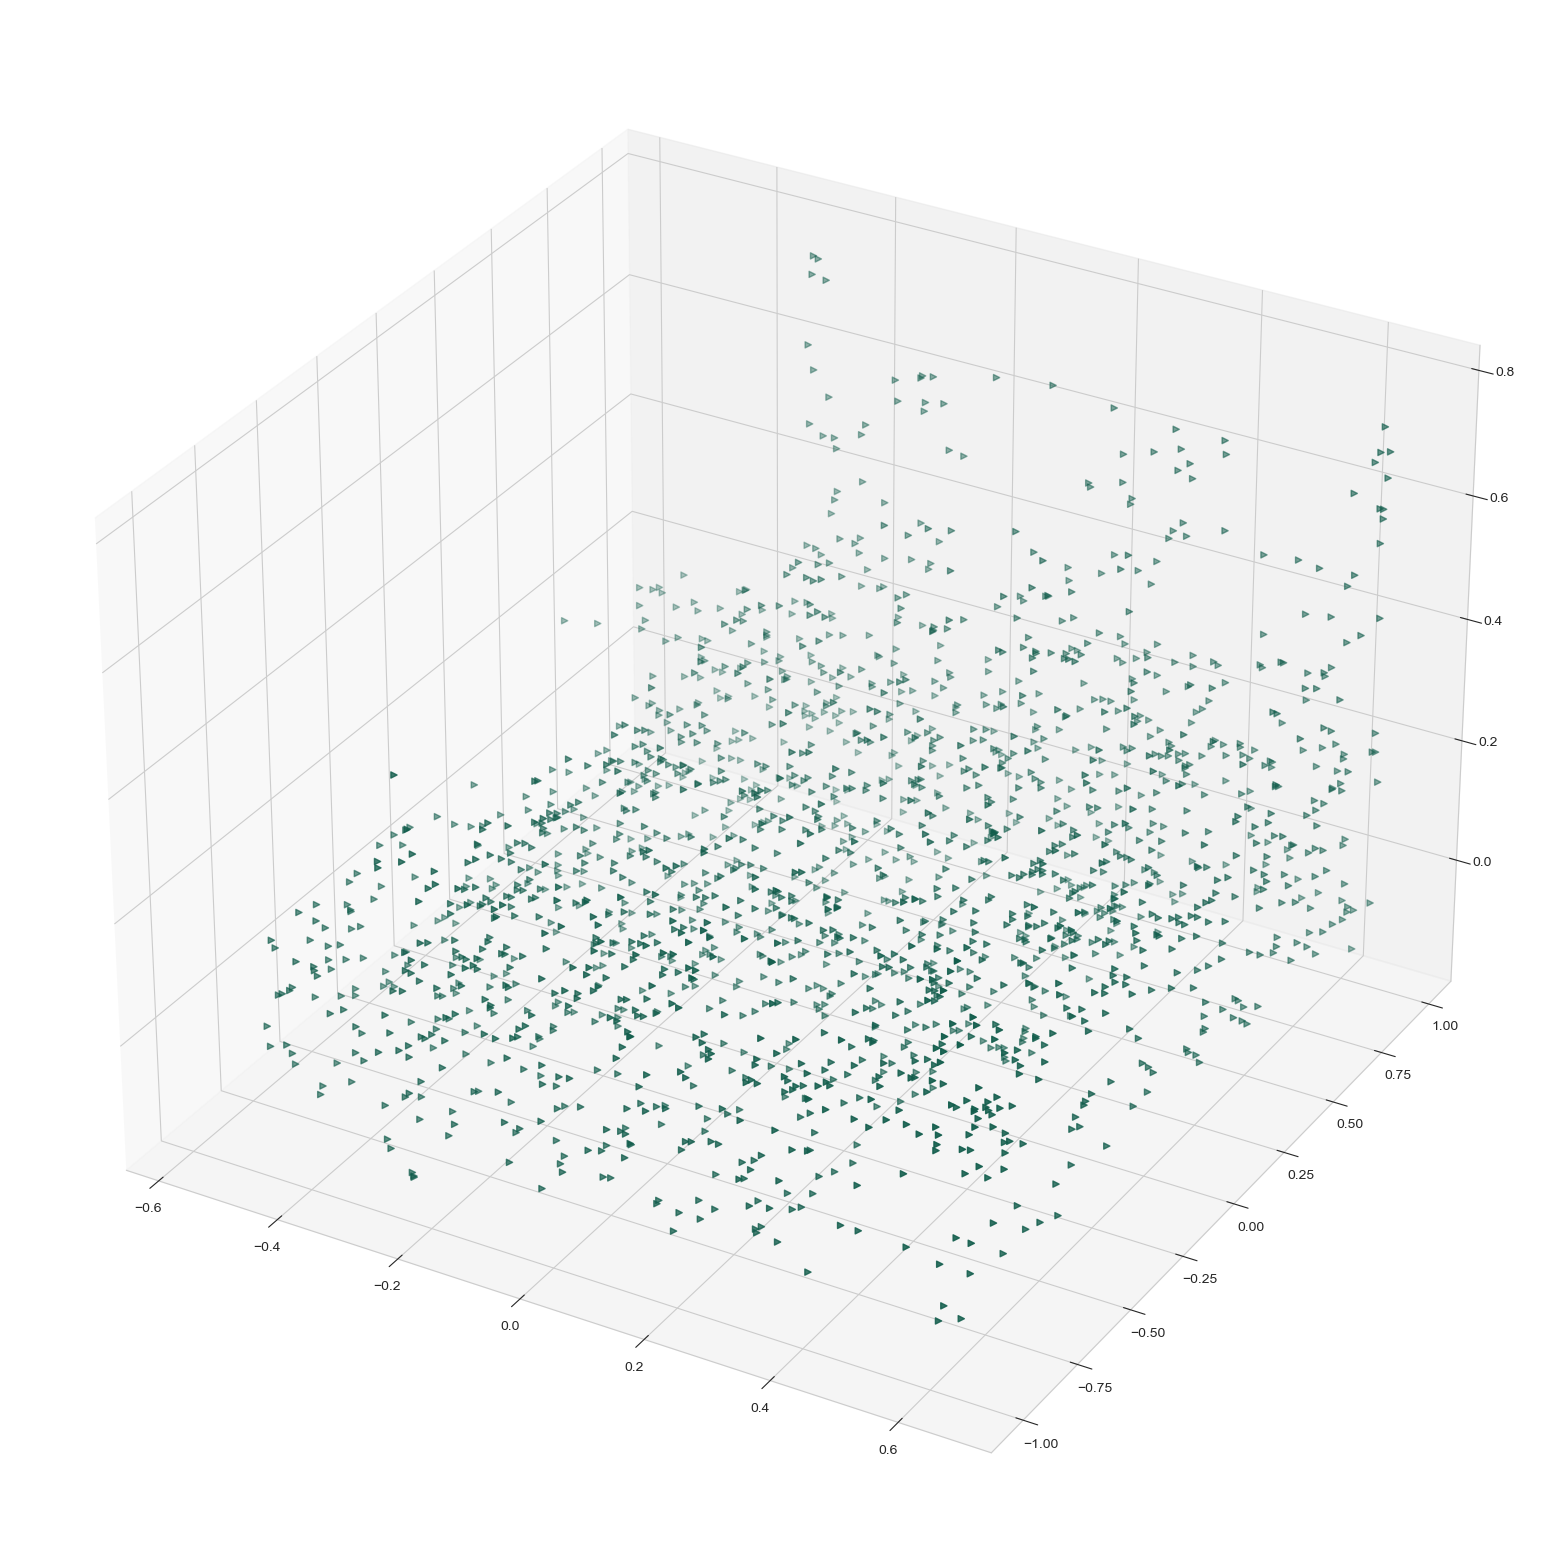

In [12]:
plot_3d_scatter(bed_data.pos, label='Bed')

In [13]:
# Trying to visualize a night_stand example
night_stand_data = None
for i in range(len(train)):
    if train[i].y == 5:
        night_stand_data = train[i]
        break
print(night_stand_data)

KeyboardInterrupt: 

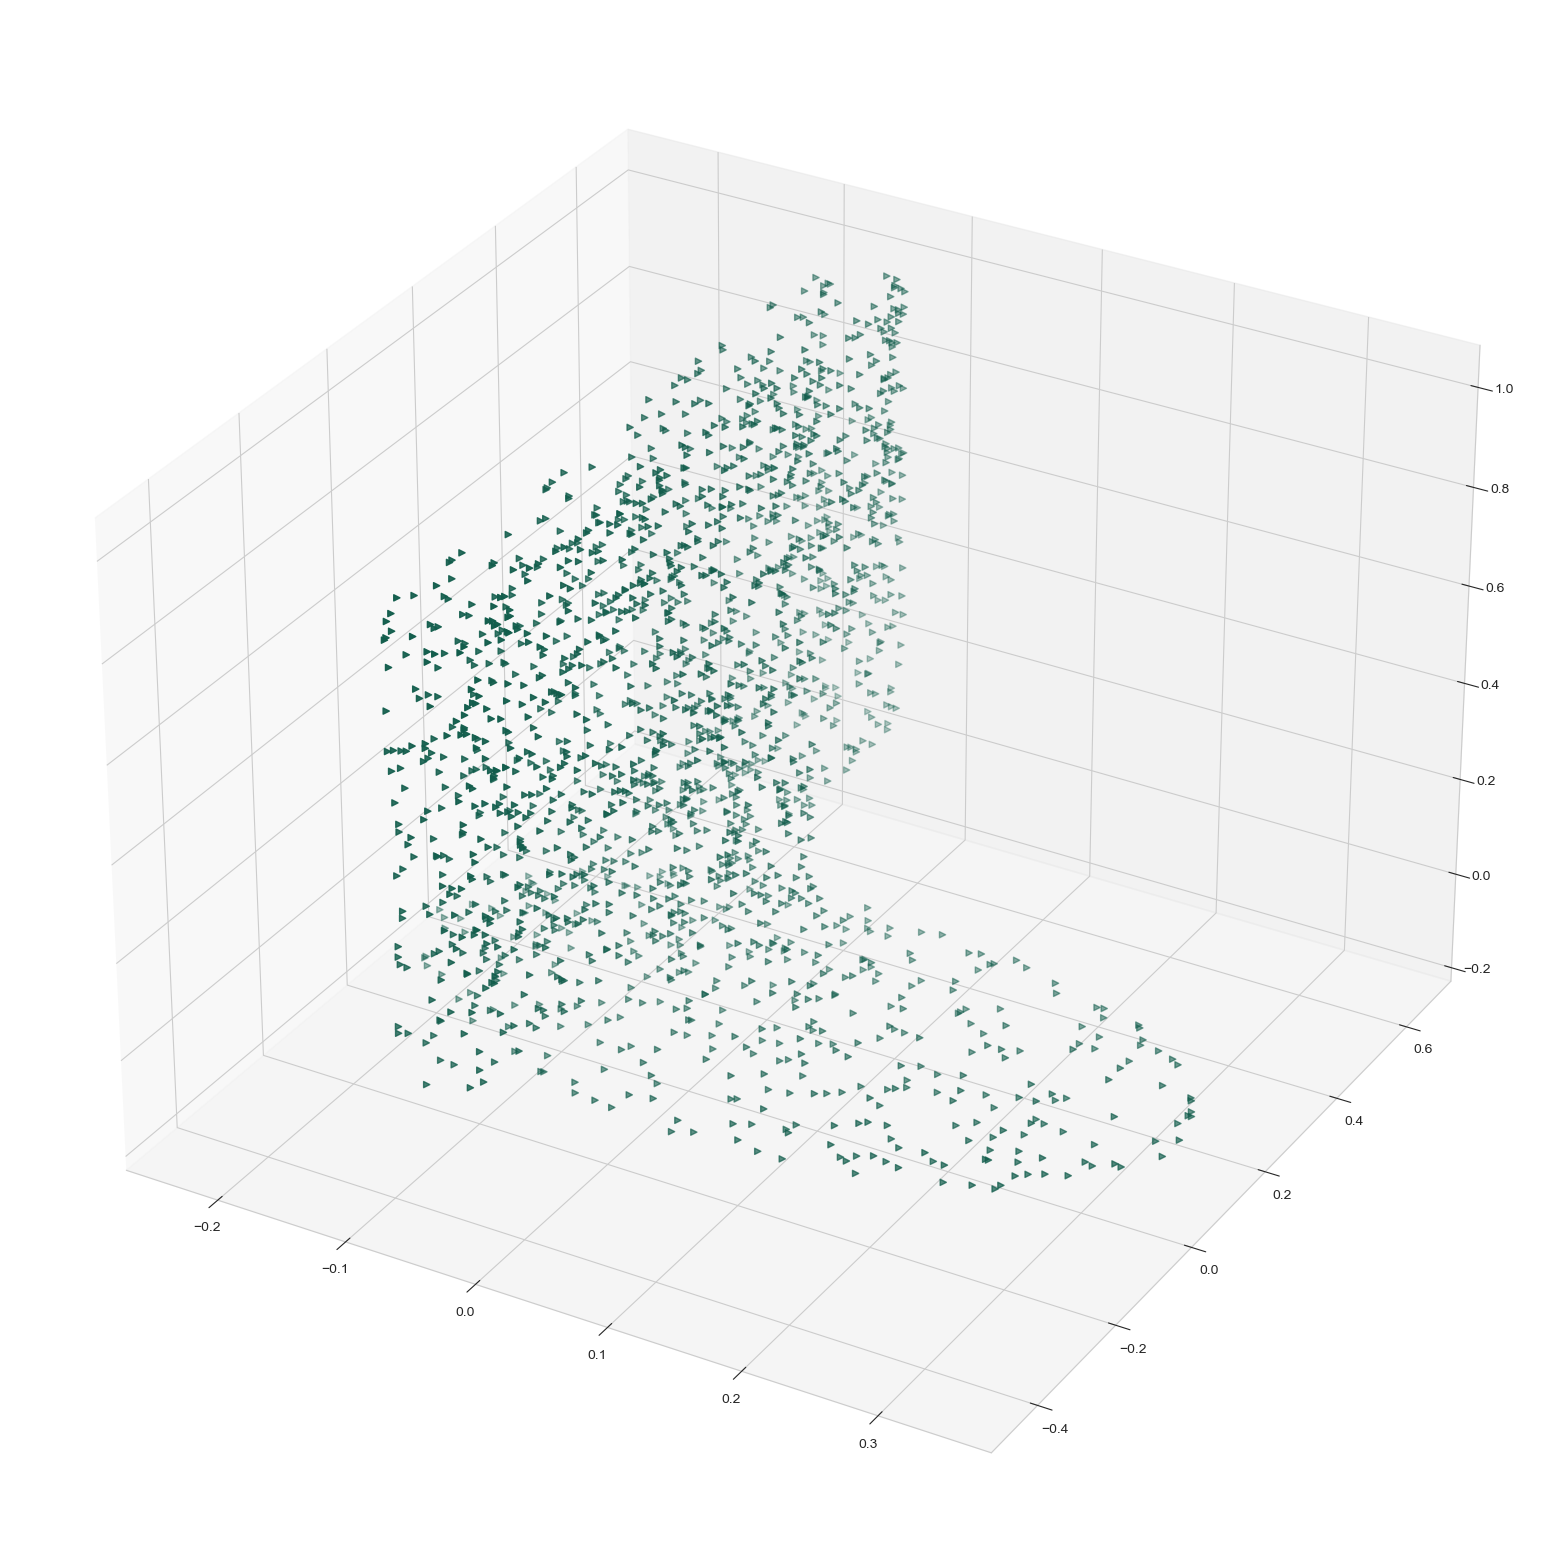

In [54]:
plot_3d_scatter(night_stand_data.pos, label='Night Stand')

In [8]:
test.print_summary()

ModelNet (#graphs=908):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     2048 |        0 |
| std        |        0 |        0 |
| min        |     2048 |        0 |
| quantile25 |     2048 |        0 |
| median     |     2048 |        0 |
| quantile75 |     2048 |        0 |
| max        |     2048 |        0 |
+------------+----------+----------+


In [9]:
print(f'Number of classes: {test.num_classes}')
print(f'Number of features: {test.num_features}')
print(f'Number of test examples: {len(test)}')

Number of classes: 10
Number of features: 0
Number of test examples: 908


In [10]:
print(test.y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [57]:
# defining the parameters like batch size and number of workers
batch_size = 128
num_workers = os.cpu_count()

In [58]:
# defining the DataLoader for the train and test datasets
train_loader = tg.loader.DataLoader(train, batch_size=batch_size, num_workers=num_workers, shuffle=True)

test_loader = tg.loader.DataLoader(test, batch_size=batch_size, num_workers=num_workers, shuffle=False)

# Defining the PointNet++ model
Courtesy of: https://wandb.ai/geekyrakshit/pyg-point-cloud/reports/Point-Cloud-Classification-Using-PyTorch-Geometric--VmlldzozMTExMTE3

In [59]:
# Defining Local Set Abstraction Implementation
from torch_geometric.nn import PointNetConv, fps, radius

In [60]:
class SetAbstraction(torch.nn.Module):
    def __init__(self, ratio, ball_query_radius, nn):
        super().__init__()
        self.ratio = ratio
        self.ball_query_radius = ball_query_radius
        self.conv = PointNetConv(nn, add_self_loops=False)

    def forward(self, x, pos, batch):
        idx = fps(pos, batch, ratio=self.ratio)
        row, col = radius(
            pos, pos[idx], self.ball_query_radius,
            batch, batch[idx], max_num_neighbors=64)
        edge_index = torch.stack([col, row], dim=0)
        x_dst = None if x is None else x[idx]
        x = self.conv((x, x_dst), (pos, pos[idx]), edge_index)
        pos, batch = pos[idx], batch[idx]
        return x, pos, batch

In [61]:
# Defining the Global Set Abstraction Implementation
from torch_geometric.nn import global_max_pool

In [62]:
class GlobalSetAbstraction(torch.nn.Module):
    def __init__(self, nn):
        super().__init__()
        self.nn = nn

    def forward(self, x, pos, batch):
        x = self.nn(torch.cat([x, pos], dim=1))
        x = global_max_pool(x, batch)
        pos = pos.new_zeros((x.size(0), 3))
        batch = torch.arange(
            x.size(0),
            device=batch.device
        )
        return x, pos, batch

In [63]:
# Defining the MLP Implementation
from torch_geometric.nn import MLP

In [64]:
# Defining the PointNet++ model
class PointNetPlusPlus(torch.nn.Module):
    def __init__(self,
                 set_abstraction_ratio_1, set_abstraction_ratio_2,set_abstraction_radius_1, set_abstraction_radius_2, dropout):
        super().__init__()
        # Input channels account for both `pos` and node features.
        self.sa1_module = SetAbstraction(set_abstraction_ratio_1, set_abstraction_radius_1, MLP([3, 64, 64, 128]))
        self.sa2_module = SetAbstraction(set_abstraction_ratio_2, set_abstraction_radius_2, MLP([128 + 3, 128, 128, 256]))
        self.sa3_module = GlobalSetAbstraction(MLP([256 + 3, 256, 512, 1024]))
        self.mlp = MLP([1024, 512, 256, 10], dropout=dropout, norm=None)


    def forward(self, data):
        sa0_out = (data.x, data.pos, data.batch)
        sa1_out = self.sa1_module(*sa0_out)
        sa2_out = self.sa2_module(*sa1_out)
        sa3_out = self.sa3_module(*sa2_out)
        x, pos, batch = sa3_out
        return self.mlp(x).log_softmax(dim=-1)

In [65]:
from tqdm import tqdm
import torch.nn.functional as F

In [66]:
# Defining the training step
def train_step(epoch, total_epochs, model, train_loader, optimizer, device):
    model.train()
    epoch_loss, correct = 0, 0
    num_train_examples = len(train_loader)
    
    progress_bar = tqdm(
        range(num_train_examples),
        desc=f"Training Epoch {epoch}/{total_epochs}"
    )
    for batch_idx in progress_bar:
        data = next(iter(train_loader)).to(device)
        
        optimizer.zero_grad()
        prediction = model(data)
        loss = F.nll_loss(prediction, data.y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        correct += prediction.max(1)[1].eq(data.y).sum().item()
    
    epoch_loss = epoch_loss / num_train_examples
    epoch_accuracy = correct / len(train_loader.dataset)
    
    print({
        "Train/Loss": epoch_loss,
        "Train/Accuracy": epoch_accuracy
    })
    
    return epoch_loss, epoch_accuracy

In [67]:
# Defining the evaluation step
def test_step(epoch, total_epochs, model, test_loader, device):
    model.eval()
    
    epoch_loss, correct = 0, 0
    num_val_examples = len(test_loader)

    progress_bar = tqdm(
        range(num_val_examples),
        desc=f"Validation Epoch {epoch}/{total_epochs}"
    )

    for batch_idx in progress_bar:
        data = next(iter(test_loader)).to(device)
        
        with torch.no_grad():
            prediction = model(data)
        
        loss = F.nll_loss(prediction, data.y)
        epoch_loss += loss.item()
        correct += prediction.max(1)[1].eq(data.y).sum().item()
    
    epoch_loss = epoch_loss / num_val_examples
    epoch_accuracy = correct / len(test_loader.dataset)
    
    print({
        "Validation/Loss": epoch_loss,
        "Validation/Accuracy": epoch_accuracy
    })
    return epoch_loss, epoch_accuracy

In [68]:
# Defining the device, model and optimizer
device = torch.device('cpu')
model = PointNetPlusPlus(0.5, 0.5, 0.2, 0.4, 0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
total_epochs = 10

In [69]:
# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [70]:
# Training the model
train_losses, test_losses = [], []
train_accuracy, test_accuracy = [], []

for epoch in range(total_epochs):
    train_loss, train_accuracy = train_step(epoch, total_epochs, model, train_loader, optimizer, device)
    test_loss, test_accuracy = test_step(epoch, total_epochs, model, test_loader, device)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracy.append(train_accuracy)
    test_accuracy.append(test_accuracy)

Training Epoch 0/10:   0%|          | 0/32 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniforge/base/envs/gdl_env/lib/python3.8/site-packages/torch_geometric/transforms/sample_points.py:40: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Cross.cpp:66.)
  area = (pos[face[1]] - pos[face[0]]).cross(pos[face[2]] - pos[face[0]])
/opt/homebrew/Caskroom/miniforge/base/envs/gdl_env/lib/python3.8/site-packages/torch_geometric/transforms/sample_points.py:40: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at 

KeyboardInterrupt: 

In [ ]:
# Plotting the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plotting the training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()